In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("GlobalLandTemperatures_GlobalTemperatures.csv")
df

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [3]:
df['dt'] = pd.to_datetime(df['dt'])





In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype         
---  ------                                     --------------  -----         
 0   dt                                         3192 non-null   datetime64[ns]
 1   LandAverageTemperature                     3180 non-null   float64       
 2   LandAverageTemperatureUncertainty          3180 non-null   float64       
 3   LandMaxTemperature                         1992 non-null   float64       
 4   LandMaxTemperatureUncertainty              1992 non-null   float64       
 5   LandMinTemperature                         1992 non-null   float64       
 6   LandMinTemperatureUncertainty              1992 non-null   float64       
 7   LandAndOceanAverageTemperature             1992 non-null   float64       
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64       
dtypes: datetime64[ns](1)

In [5]:
import pandas as pd


df['dt'] = pd.to_datetime(df['dt'])  
# Set the 'dt' column as the index
df.set_index('dt', inplace=True)




In [6]:
df.isnull().sum()

LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [7]:
import pandas as pd

columns_to_interpolate = ['LandAverageTemperature', 'LandAverageTemperatureUncertainty']

# Interpolate the null values in the specified columns
df[columns_to_interpolate] = df[columns_to_interpolate].interpolate()




In [8]:
df.isnull().sum()

LandAverageTemperature                          0
LandAverageTemperatureUncertainty               0
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [9]:
import pandas as pd


column_to_check = 'LandMaxTemperature'

# Drop rows where the specified column has missing values
df = df.dropna(subset=[column_to_check])


In [10]:
df.isnull().sum()

LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [11]:
df['year'] = df.index.year
df['month'] = df.index.month

<ipython-input-11-de188057805a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df.index.year
<ipython-input-11-de188057805a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df.index.month


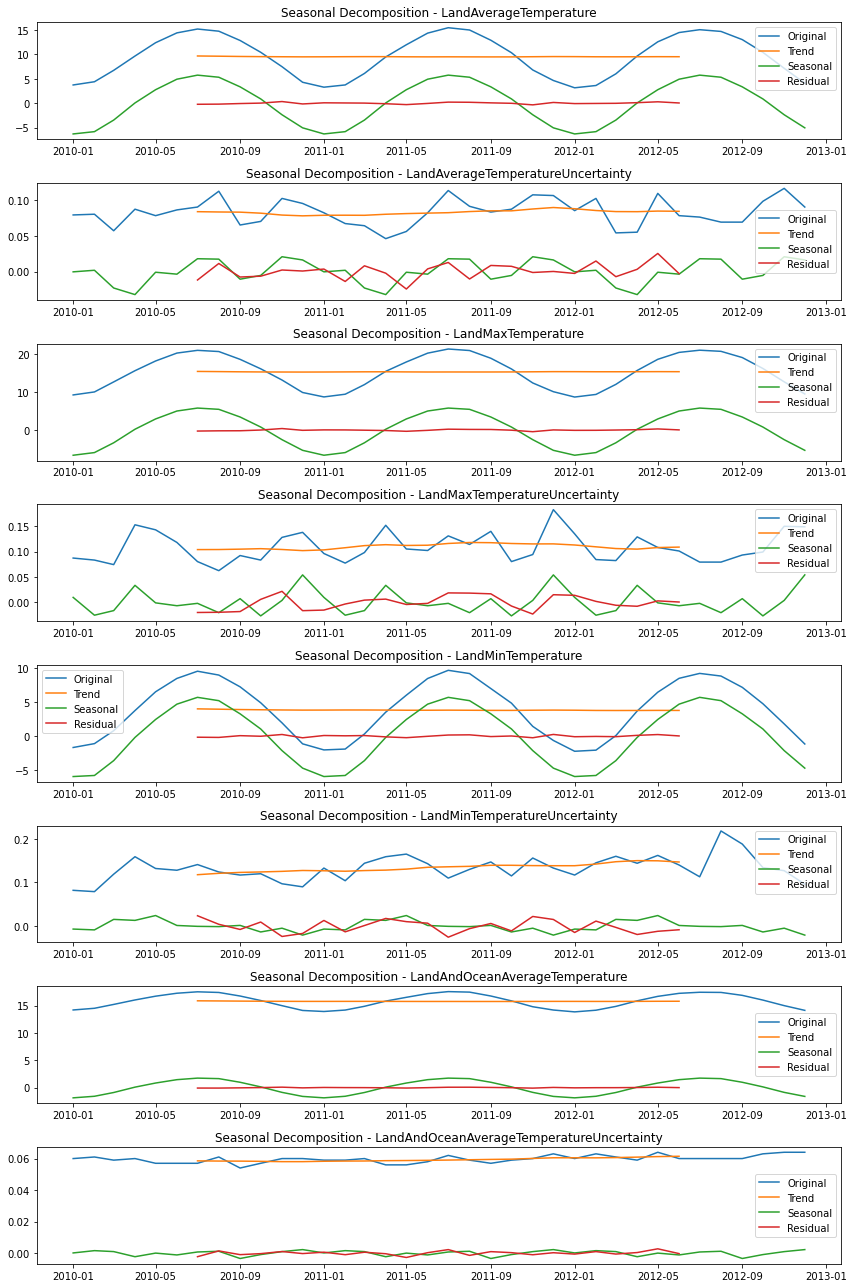

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


columns_to_check = [
    'LandAverageTemperature',
    'LandAverageTemperatureUncertainty',
    'LandMaxTemperature',
    'LandMaxTemperatureUncertainty',
    'LandMinTemperature',
    'LandMinTemperatureUncertainty',
    'LandAndOceanAverageTemperature',
    'LandAndOceanAverageTemperatureUncertainty'
]



# Create seasonal decomposition plots for each column
plt.figure(figsize=(12, 18))
for i, column in enumerate(columns_to_check, 1):
    
    df_2020 = df[df.year.isin([2010,2011,2012])]
    
    
    result = sm.tsa.seasonal_decompose(df_2020[column], model='additive')
    
    plt.subplot(len(columns_to_check), 1, i)
    plt.plot(df_2020[column], label='Original')
    plt.plot(result.trend, label='Trend')
    plt.plot(result.seasonal, label='Seasonal')
    plt.plot(result.resid, label='Residual')
    plt.title(f'Seasonal Decomposition - {column}')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()


In [13]:
df

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,year,month
dt,,,,,,,,,,
1850-01-01,0.749,1.105,8.242,1.738,-3.206,2.822,12.833,0.367,1850,1
1850-02-01,3.071,1.275,9.970,3.007,-2.291,1.623,13.588,0.414,1850,2
1850-03-01,4.954,0.955,10.347,2.401,-1.905,1.410,14.043,0.341,1850,3
1850-04-01,7.217,0.665,12.934,1.004,1.018,1.329,14.667,0.267,1850,4
1850-05-01,10.004,0.617,15.655,2.406,3.811,1.347,15.507,0.249,1850,5
...,...,...,...,...,...,...,...,...,...,...
2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057,2015,8
2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058,2015,9
2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062,2015,10


In [14]:
df['LandAverageTemperature_shifted_36'] = df['LandAverageTemperature'].shift(36)
df['LandAverageTemperature_shifted_37'] = df['LandAverageTemperature'].shift(37)
df['LandAverageTemperature_shifted_38'] = df['LandAverageTemperature'].shift(38)


<ipython-input-14-169947035e10>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandAverageTemperature_shifted_36'] = df['LandAverageTemperature'].shift(36)
<ipython-input-14-169947035e10>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandAverageTemperature_shifted_37'] = df['LandAverageTemperature'].shift(37)
<ipython-input-14-169947035e10>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [15]:
df['LandAverageTemperature_rolling_7'] = df['LandAverageTemperature'].rolling(window=7).mean().shift(36)
df['LandAverageTemperature_rolling_8'] = df['LandAverageTemperature'].rolling(window=8).mean().shift(36)
df['LandAverageTemperature_rolling_9'] = df['LandAverageTemperature'].rolling(window=9).mean().shift(36)
df['LandAverageTemperature_rolling_10'] = df['LandAverageTemperature'].rolling(window=10).mean().shift(36)
df['LandAverageTemperature_rolling_16'] = df['LandAverageTemperature'].rolling(window=16).mean().shift(36)


<ipython-input-15-2ed5bad57380>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandAverageTemperature_rolling_7'] = df['LandAverageTemperature'].rolling(window=7).mean().shift(36)
<ipython-input-15-2ed5bad57380>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandAverageTemperature_rolling_8'] = df['LandAverageTemperature'].rolling(window=8).mean().shift(36)
<ipython-input-15-2ed5bad57380>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [16]:
df['LandAverageTemperature_rolling_7'] = df['LandAverageTemperature'].rolling(window=7).mean().shift(37)
df['LandAverageTemperature_rolling_8'] = df['LandAverageTemperature'].rolling(window=8).mean().shift(37)
df['LandAverageTemperature_rolling_9'] = df['LandAverageTemperature'].rolling(window=9).mean().shift(37)
df['LandAverageTemperature_rolling_10'] = df['LandAverageTemperature'].rolling(window=10).mean().shift(37)
df['LandAverageTemperature_rolling_16'] = df['LandAverageTemperature'].rolling(window=16).mean().shift(37)


<ipython-input-16-7a59249f3c5a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandAverageTemperature_rolling_7'] = df['LandAverageTemperature'].rolling(window=7).mean().shift(37)
<ipython-input-16-7a59249f3c5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandAverageTemperature_rolling_8'] = df['LandAverageTemperature'].rolling(window=8).mean().shift(37)
<ipython-input-16-7a59249f3c5a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [17]:
df['LandAverageTemperature_rolling_7'] = df['LandAverageTemperature'].rolling(window=7).mean().shift(38)
df['LandAverageTemperature_rolling_8'] = df['LandAverageTemperature'].rolling(window=8).mean().shift(38)
df['LandAverageTemperature_rolling_9'] = df['LandAverageTemperature'].rolling(window=9).mean().shift(38)
df['LandAverageTemperature_rolling_10'] = df['LandAverageTemperature'].rolling(window=10).mean().shift(38)
df['LandAverageTemperature_rolling_16'] = df['LandAverageTemperature'].rolling(window=16).mean().shift(38)


<ipython-input-17-b3f14677672b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandAverageTemperature_rolling_7'] = df['LandAverageTemperature'].rolling(window=7).mean().shift(38)
<ipython-input-17-b3f14677672b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandAverageTemperature_rolling_8'] = df['LandAverageTemperature'].rolling(window=8).mean().shift(38)
<ipython-input-17-b3f14677672b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [18]:
# Assuming df is your DataFrame

# Define the window sizes you want to use for rolling calculations
window_sizes = [7, 8, 9, 10, 16]

# Apply rolling mean calculations for each window size with a shift of 36
for window_size in window_sizes:
    column_name = f'LandAverageTemperatureUncertainty_rolling_{window_size}'
    df[column_name] = df['LandAverageTemperatureUncertainty'].rolling(window=window_size).mean().shift(36)


<ipython-input-18-da9c593c8b06>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df['LandAverageTemperatureUncertainty'].rolling(window=window_size).mean().shift(36)


In [19]:
# Assuming df is your DataFrame

# Define the window sizes you want to use for rolling calculations
window_sizes = [7, 8, 9, 10, 16]

# Apply rolling mean calculations for each window size with a shift of 36
for window_size in window_sizes:
    column_name = f'LandAverageTemperatureUncertainty_rolling_{window_size}'
    df[column_name] = df['LandAverageTemperatureUncertainty'].rolling(window=window_size).mean().shift(37)


<ipython-input-19-53bc3e782b80>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df['LandAverageTemperatureUncertainty'].rolling(window=window_size).mean().shift(37)


In [20]:
# Assuming df is your DataFrame

# Define the window sizes you want to use for rolling calculations
window_sizes = [7, 8, 9, 10, 16]

# Apply rolling mean calculations for each window size with a shift of 36
for window_size in window_sizes:
    column_name = f'LandAverageTemperatureUncertainty_rolling_{window_size}'
    df[column_name] = df['LandAverageTemperatureUncertainty'].rolling(window=window_size).mean().shift(38)


<ipython-input-20-1392a64843c0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column_name] = df['LandAverageTemperatureUncertainty'].rolling(window=window_size).mean().shift(38)


In [21]:
# Assuming df is your DataFrame

# Drop the 'LandAverageTemperatureUncertainty' column
df.drop('LandAverageTemperatureUncertainty', axis=1, inplace=True)


C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [22]:
# Assuming df is your DataFrame

# Define the rolling window sizes and shift value
rolling_windows = [7, 8, 9, 10, 16]
shift_value = 36

# Define the column you want to process
column_to_process = 'LandMaxTemperature'

# Loop through each rolling window size and apply the operation
for window_size in rolling_windows:
    new_column_name = f"{column_to_process}_rolling_{window_size}"
    df[new_column_name] = df[column_to_process].rolling(window=window_size).mean().shift(shift_value)


<ipython-input-22-ad10868b4f93>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name] = df[column_to_process].rolling(window=window_size).mean().shift(shift_value)


In [23]:
# Assuming df is your DataFrame

# Define the rolling window sizes and shift value
rolling_windows = [7, 8, 9, 10, 16]
shift_value = 37

# Define the column you want to process
column_to_process = 'LandMaxTemperature'

# Loop through each rolling window size and apply the operation
for window_size in rolling_windows:
    new_column_name = f"{column_to_process}_rolling_{window_size}"
    df[new_column_name] = df[column_to_process].rolling(window=window_size).mean().shift(shift_value)


<ipython-input-23-124278e5775f>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name] = df[column_to_process].rolling(window=window_size).mean().shift(shift_value)


In [24]:
# Assuming df is your DataFrame

# Define the rolling window sizes and shift value
rolling_windows = [7, 8, 9, 10, 16]
shift_value = 38

# Define the column you want to process
column_to_process = 'LandMaxTemperature'

# Loop through each rolling window size and apply the operation
for window_size in rolling_windows:
    new_column_name = f"{column_to_process}_rolling_{window_size}"
    df[new_column_name] = df[column_to_process].rolling(window=window_size).mean().shift(shift_value)


<ipython-input-24-023b657c1db4>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_column_name] = df[column_to_process].rolling(window=window_size).mean().shift(shift_value)


In [25]:
df.drop('LandMaxTemperature', axis=1, inplace=True)


In [26]:
# Apply rolling mean and shift operations to LandMinTemperature
df['LandMinTemperature_rolling_7'] = df['LandMinTemperature'].rolling(window=7).mean().shift(36)
df['LandMinTemperature_rolling_8'] = df['LandMinTemperature'].rolling(window=8).mean().shift(36)
df['LandMinTemperature_rolling_9'] = df['LandMinTemperature'].rolling(window=9).mean().shift(36)
df['LandMinTemperature_rolling_10'] = df['LandMinTemperature'].rolling(window=10).mean().shift(36)
df['LandMinTemperature_rolling_16'] = df['LandMinTemperature'].rolling(window=16).mean().shift(36)


<ipython-input-26-a811cb09c32b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandMinTemperature_rolling_7'] = df['LandMinTemperature'].rolling(window=7).mean().shift(36)
<ipython-input-26-a811cb09c32b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandMinTemperature_rolling_8'] = df['LandMinTemperature'].rolling(window=8).mean().shift(36)
<ipython-input-26-a811cb09c32b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [27]:
# Apply rolling mean and shift operations to LandMinTemperature
df['LandMinTemperature_rolling_7'] = df['LandMinTemperature'].rolling(window=7).mean().shift(37)
df['LandMinTemperature_rolling_8'] = df['LandMinTemperature'].rolling(window=8).mean().shift(37)
df['LandMinTemperature_rolling_9'] = df['LandMinTemperature'].rolling(window=9).mean().shift(37)
df['LandMinTemperature_rolling_10'] = df['LandMinTemperature'].rolling(window=10).mean().shift(37)
df['LandMinTemperature_rolling_16'] = df['LandMinTemperature'].rolling(window=16).mean().shift(37)


<ipython-input-27-37cbd32dd3c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandMinTemperature_rolling_7'] = df['LandMinTemperature'].rolling(window=7).mean().shift(37)
<ipython-input-27-37cbd32dd3c9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandMinTemperature_rolling_8'] = df['LandMinTemperature'].rolling(window=8).mean().shift(37)
<ipython-input-27-37cbd32dd3c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [28]:
# Apply rolling mean and shift operations to LandMinTemperature
df['LandMinTemperature_rolling_7'] = df['LandMinTemperature'].rolling(window=7).mean().shift(38)
df['LandMinTemperature_rolling_8'] = df['LandMinTemperature'].rolling(window=8).mean().shift(38)
df['LandMinTemperature_rolling_9'] = df['LandMinTemperature'].rolling(window=9).mean().shift(38)
df['LandMinTemperature_rolling_10'] = df['LandMinTemperature'].rolling(window=10).mean().shift(38)
df['LandMinTemperature_rolling_16'] = df['LandMinTemperature'].rolling(window=16).mean().shift(38)


<ipython-input-28-749d451acb44>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandMinTemperature_rolling_7'] = df['LandMinTemperature'].rolling(window=7).mean().shift(38)
<ipython-input-28-749d451acb44>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['LandMinTemperature_rolling_8'] = df['LandMinTemperature'].rolling(window=8).mean().shift(38)
<ipython-input-28-749d451acb44>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [29]:
df.drop('LandMinTemperature', axis=1, inplace=True)


In [30]:
df.fillna(0, inplace=True)


C:\Users\USER\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [31]:
print(df.columns)


Index(['LandAverageTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperatureUncertainty', 'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty', 'year', 'month',
       'LandAverageTemperature_shifted_36',
       'LandAverageTemperature_shifted_37',
       'LandAverageTemperature_shifted_38', 'LandAverageTemperature_rolling_7',
       'LandAverageTemperature_rolling_8', 'LandAverageTemperature_rolling_9',
       'LandAverageTemperature_rolling_10',
       'LandAverageTemperature_rolling_16',
       'LandAverageTemperatureUncertainty_rolling_7',
       'LandAverageTemperatureUncertainty_rolling_8',
       'LandAverageTemperatureUncertainty_rolling_9',
       'LandAverageTemperatureUncertainty_rolling_10',
       'LandAverageTemperatureUncertainty_rolling_16',
       'LandMaxTemperature_rolling_7', 'LandMaxTemperature_rolling_8',
       'LandMaxTemperature_rolling_9', 'LandMaxTemperature_rolling_10',
       'LandMaxTemperature_rolling_16', '

In [32]:
df.fillna(0, inplace=True)

In [38]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_regression

# In this example, we are using the columns you specified as the features
feature_columns = [
    'LandAverageTemperature', 'LandMaxTemperatureUncertainty', 'LandMinTemperatureUncertainty',
    'LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty',
    'year', 'month',
    'LandAverageTemperature_shifted_36', 'LandAverageTemperature_shifted_37', 'LandAverageTemperature_shifted_38',
    'LandAverageTemperature_rolling_7', 'LandAverageTemperature_rolling_8',
    'LandAverageTemperature_rolling_9',
    'LandAverageTemperatureUncertainty_rolling_7', 'LandAverageTemperatureUncertainty_rolling_8',
    'LandAverageTemperatureUncertainty_rolling_9', 'LandAverageTemperatureUncertainty_rolling_10',
    'LandAverageTemperatureUncertainty_rolling_16',
    'LandMaxTemperature_rolling_7', 'LandMaxTemperature_rolling_8', 'LandMaxTemperature_rolling_9',
    'LandMaxTemperature_rolling_10', 'LandMaxTemperature_rolling_16',
    'LandMinTemperature_rolling_7', 'LandMinTemperature_rolling_8', 'LandMinTemperature_rolling_9',
    'LandMinTemperature_rolling_10', 'LandMinTemperature_rolling_16'
]
X = df[feature_columns]
y = df['LandAverageTemperature']

# Initialize SelectKBest with the f_regression scoring function
# and specify the number of top features (k) you want to select
k_best = SelectKBest(score_func=f_regression, k=4)  # Choose the number of features you want to select

# Fit SelectKBest to your data
k_best = k_best.fit(X, y)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['LandAndOceanAverageTemperature', 'LandAverageTemperature_shifted_36',
       'LandAverageTemperature_shifted_37', 'LandMinTemperature_rolling_8'],
      dtype='object')


In [37]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

# Assuming your DataFrame is named df
# List of variables to check for stationarity
variables_to_check = [
    'LandAverageTemperature_shifted_36',
    'LandAverageTemperature_shifted_37',
    'LandMinTemperature_rolling_9',
    'LandMinTemperature_rolling_8'
]

# Set the significance level for the ADF test (typically 0.05)
significance_level = 0.05

# Perform the Augmented Dickey-Fuller test for each variable
for variable in variables_to_check:
    data = df[variable]
    
    # Perform the ADF test
    result = adfuller(data)
    
    # Print the results
    print(f"Variable: {variable}")
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"{key}: {value}")
    
    # Check if the variable is stationary based on the p-value
    if result[1] <= significance_level:
        print(f"{variable} is stationary (p-value <= {significance_level})")
    else:
        print(f"{variable} is not stationary (p-value > {significance_level})")
    
    print("\n")


Variable: LandAverageTemperature_shifted_36
ADF Statistic: -9.875814895563783
p-value: 3.885303716696486e-17
Critical Values:
1%: -3.4336788532475775
5%: -2.8630104945933974
10%: -2.567552830738709
LandAverageTemperature_shifted_36 is stationary (p-value <= 0.05)


Variable: LandAverageTemperature_shifted_37
ADF Statistic: -9.60249010606716
p-value: 1.9041387278496021e-16
Critical Values:
1%: -3.4336788532475775
5%: -2.8630104945933974
10%: -2.567552830738709
LandAverageTemperature_shifted_37 is stationary (p-value <= 0.05)


Variable: LandMinTemperature_rolling_9
ADF Statistic: -3.8682314105863074
p-value: 0.0022814927779049414
Critical Values:
1%: -3.4336788532475775
5%: -2.8630104945933974
10%: -2.567552830738709
LandMinTemperature_rolling_9 is stationary (p-value <= 0.05)


Variable: LandMinTemperature_rolling_8
ADF Statistic: -3.818740366091288
p-value: 0.0027212922727388664
Critical Values:
1%: -3.4336771595431106
5%: -2.863009746829746
10%: -2.5675524325901415
LandMinTemperature

In [ ]:
pip install statsmodels


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

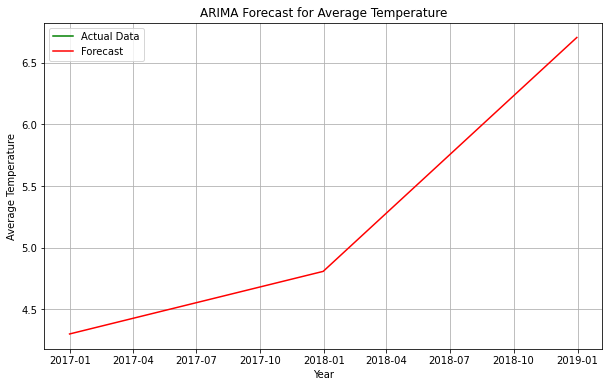

In [41]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the prepared temperature data
# Select the columns you want to include in the training data
columns_to_include = ['LandAverageTemperature',
    'year',
    'month',
    'LandAverageTemperature_shifted_36',
    'LandAverageTemperature_shifted_37',
    'LandMinTemperature_rolling_9',
    'LandMinTemperature_rolling_8'
]  # <- Added the missing closing parenthesis

# Split the data into training (up to 2015) and testing (2016, 2017, 2018) sets
train_data = df[df.index.year <= 2015][columns_to_include]
test_data = df[df.index.year >= 2016]

d, p, q = 2, 12, 1

# Fit the ARIMA model to the training data
model = ARIMA(train_data['LandAverageTemperature'], order=(p, d, q))
model_fit = model.fit(disp=0)

# Make forecasts for 2016, 2017, and 2018
forecast_periods = 3  # Number of periods to forecast (3 years)
forecast, stderr, conf_int = model_fit.forecast(steps=forecast_periods)

# Create a DataFrame for the forecasts with appropriate date indices
forecast_dates = pd.date_range(start='2016-01-01', periods=forecast_periods, freq='Y')
forecast_df = pd.DataFrame({'Forecasted_AVV': forecast}, index=forecast_dates)

# Plot the forecasts
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['LandAverageTemperature'], label='Actual Data', color='green')
plt.plot(forecast_df.index, forecast_df['Forecasted_AVV'], label='Forecast', color='red')
plt.title('ARIMA Forecast for Average Temperature')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will

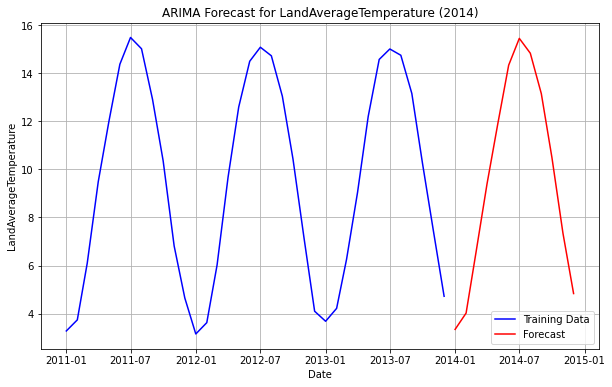

In [48]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the prepared temperature data

# Select the columns you want to use as features and the target variable
columns_to_include = [
    'year',
    'month',
    'LandAverageTemperature',
    'LandAverageTemperature_shifted_36',
    'LandAverageTemperature_shifted_37',
    'LandMinTemperature_rolling_9',
    'LandMinTemperature_rolling_8'
]

# Create a DataFrame with selected columns
data = df[columns_to_include]

# Filter data for the years 2011 to 2013 (training data)
train_data = data[(data['year'] >= 2011) & (data['year'] <= 2013)]

# Filter data for the year 2014 (testing data)
test_data = data[data['year'] == 2014]

d, p, q = 2, 12, 1

# Fit the ARIMA model to the training data
model = ARIMA(train_data['LandAverageTemperature'], order=(p, d, q))
model_fit = model.fit(disp=0)

# Make forecasts for the year 2014
forecast_periods = len(test_data)  # Number of periods to forecast (number of months in 2014)
forecast, stderr, conf_int = model_fit.forecast(steps=forecast_periods)

# Create a DataFrame for the forecasts with appropriate date indices
forecast_dates = test_data.index  # Use the index of the test data for date indices
forecast_df = pd.DataFrame({'Forecasted_LandAverageTemperature': forecast}, index=forecast_dates)

# Plot the forecasts
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data['LandAverageTemperature'], label='Training Data', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecasted_LandAverageTemperature'], label='Forecast', color='red')
plt.title('ARIMA Forecast for LandAverageTemperature (2014)')
plt.xlabel('Date')
plt.ylabel('LandAverageTemperature')
plt.legend()
plt.grid(True)
plt.show()
